In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
pokedex = pd.read_csv('Pokemon.csv', index_col = 0)
pokedex.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [35]:
pokedex.fillna('NA', inplace = True)


#### Lets divide the dataset into only Legandary pokes and plot their type 1 properties

In [36]:
legendaryPokes = pokedex[pokedex.Legendary == True]
legendaryPokes.reset_index(drop=True)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,Mewtwo,Psychic,NA,680,106,110,90,154,90,130,1,True
4,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
60,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
61,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
62,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
63,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [11]:
legendaryPokes[legendaryPokes['Type 1'] == 'Fairy']

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
716,Xerneas,Fairy,NA,680,126,131,95,131,98,99,6,True


#### This shows most pokemon have no secondary powers

#### Lets plot IQR and median of each type1 properties to their attacking prowess

<AxesSubplot: title={'center': 'Attack by Primary Type'}, xlabel='Type 1', ylabel='Attack'>

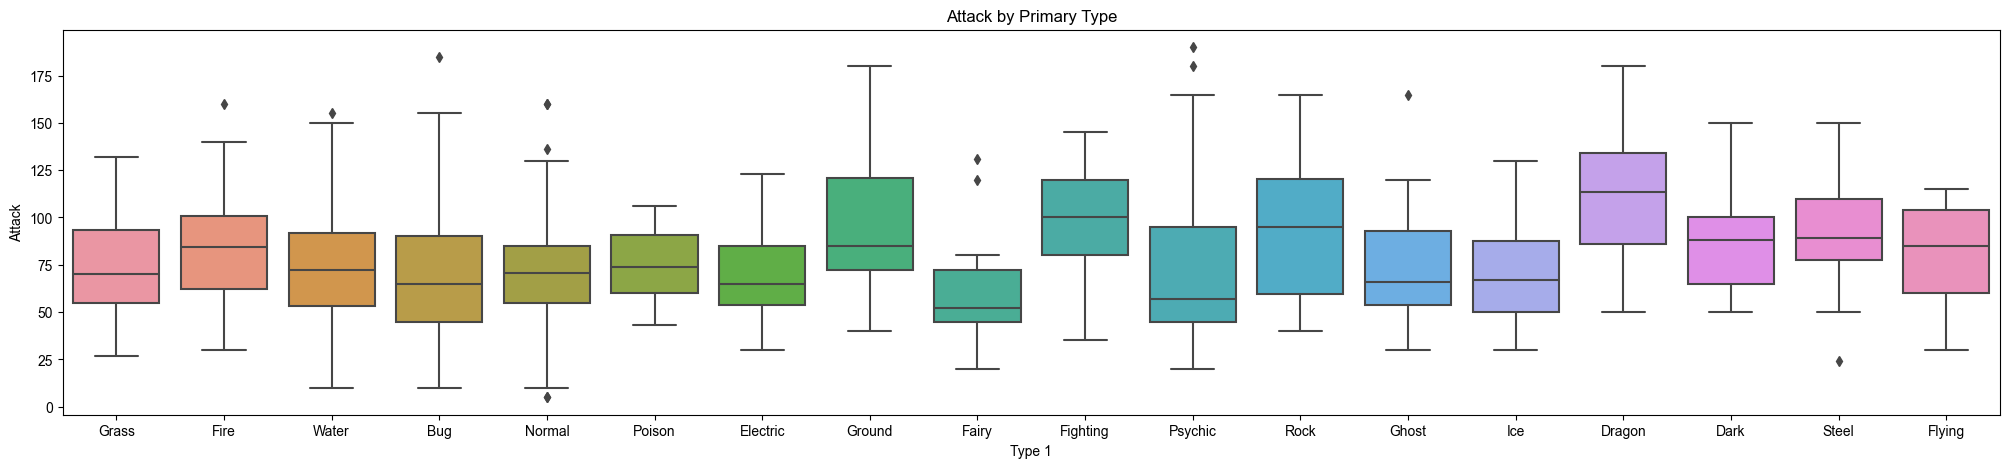

In [14]:
plt.subplots(figsize = (25,5))
plt.title('Attack by Primary Type')
sns.set_style('whitegrid')
sns.boxplot(data = pokedex, x = 'Type 1', y = 'Attack')

#### Lets plot IQR and median of each type 2 properties to their attacking prowess

<AxesSubplot: title={'center': 'Attack by Secondary Type'}, xlabel='Type 2', ylabel='Attack'>

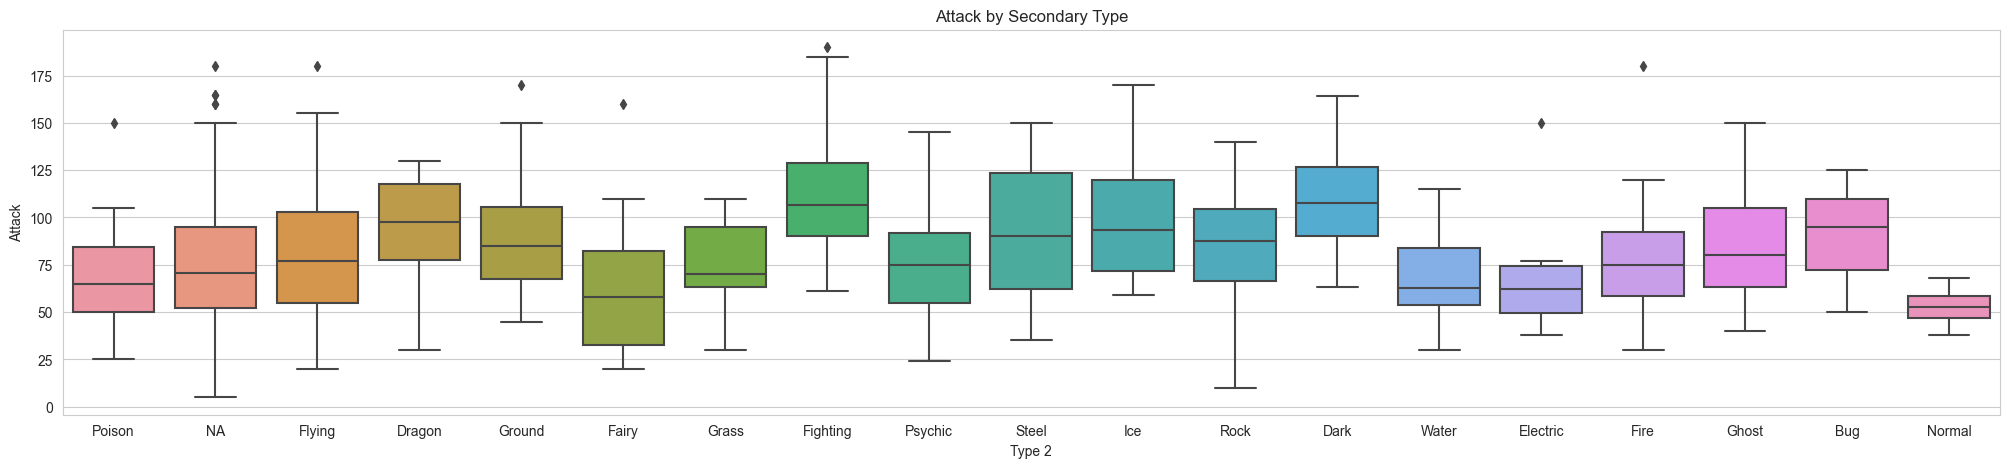

In [15]:
plt.subplots(figsize = (25,5))
plt.title('Attack by Secondary Type')
sns.set_style('whitegrid')
sns.boxplot(data = pokedex, x = 'Type 2', y = 'Attack')

#### Lets plot IQR and median of each type1 properties to their defending prowess

<AxesSubplot: title={'center': 'Defense by Primary Type'}, xlabel='Type 1', ylabel='Defense'>

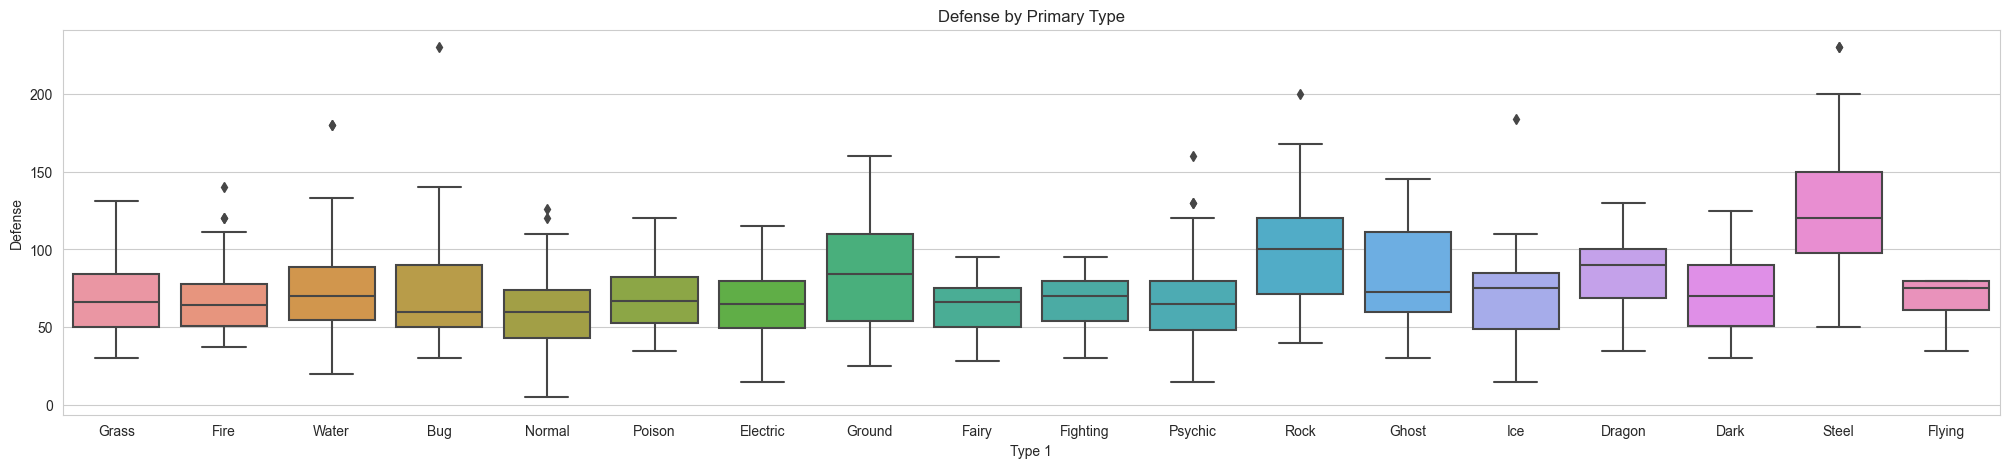

In [16]:
plt.subplots(figsize = (25,5))
plt.title('Defense by Primary Type')
sns.set_style('whitegrid')
sns.boxplot(data = pokedex, x = 'Type 1', y = 'Defense')

#### Lets plot IQR and median of each type1 properties to their defending prowess

<AxesSubplot: title={'center': 'Defense by Secondary Type'}, xlabel='Type 1', ylabel='Defense'>

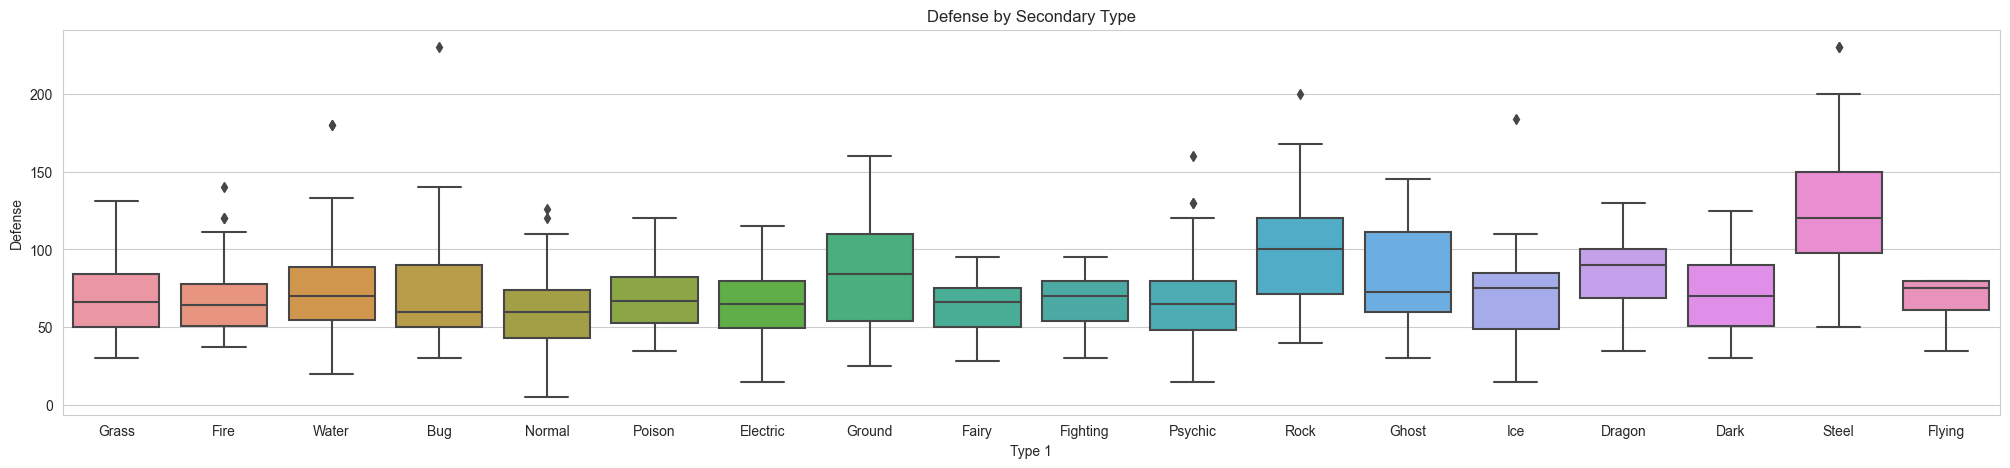

In [17]:
plt.subplots(figsize = (25,5))
plt.title('Defense by Secondary Type')
sns.set_style('whitegrid')
sns.boxplot(data = pokedex, x = 'Type 1', y = 'Defense')

#### lets create a heatmap of which type 1 proprties have what kind of type 2 properties with them

In [18]:
type_group = pokedex[pokedex['Type 2'] != 'NA'].groupby(['Type 1','Type 2']).size()
print(type_group)

Type 1  Type 2  
Bug     Electric     2
        Fighting     2
        Fire         2
        Flying      14
        Ghost        1
                    ..
Water   Ice          3
        Poison       3
        Psychic      5
        Rock         4
        Steel        1
Length: 136, dtype: int64


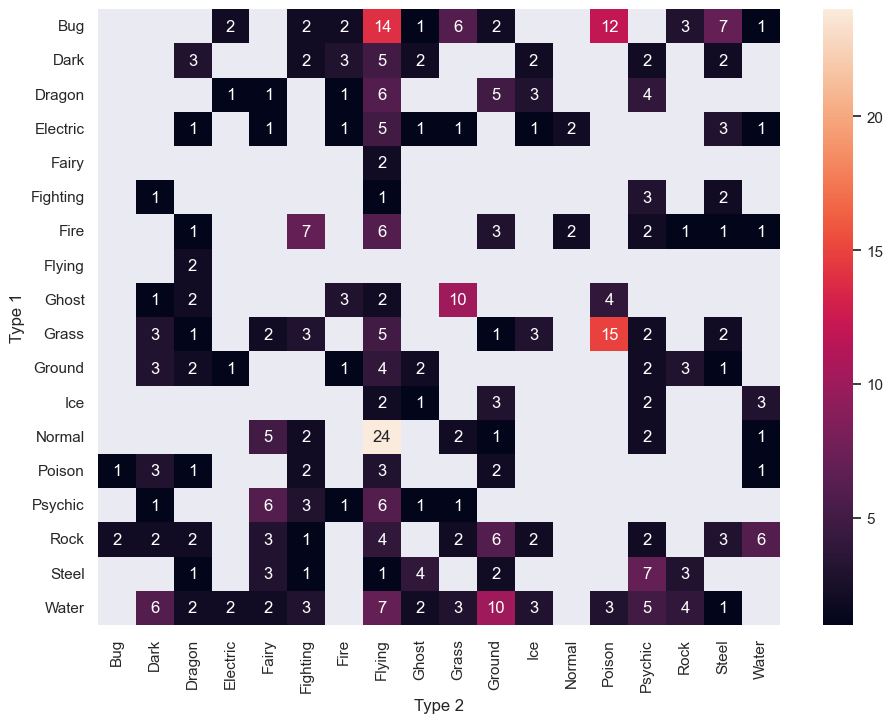

In [19]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(type_group.unstack(), annot = True)
plt.xticks(rotation = 90)
plt.show()

#### lets create a heatmap of which type 1 properties have what kind of type 2 properties with them of only legendary pokemon

In [20]:
legtype_group = legendaryPokes[legendaryPokes['Type 2'] != 'NA'].groupby(['Type 1','Type 2']).size()
print(legtype_group)

Type 1    Type 2  
Dark      Flying      1
Dragon    Electric    1
          Fire        1
          Flying      2
          Ground      1
          Ice         3
          Psychic     4
Electric  Flying      3
Fire      Flying      2
          Steel       1
          Water       1
Ghost     Dragon      2
Grass     Fighting    1
          Flying      1
Ground    Fire        1
          Flying      2
Ice       Flying      1
Psychic   Dark        1
          Fighting    1
          Fire        1
          Flying      1
          Ghost       1
Rock      Fairy       2
          Fighting    1
Steel     Dragon      1
          Fighting    1
          Psychic     1
Water     Dragon      1
dtype: int64


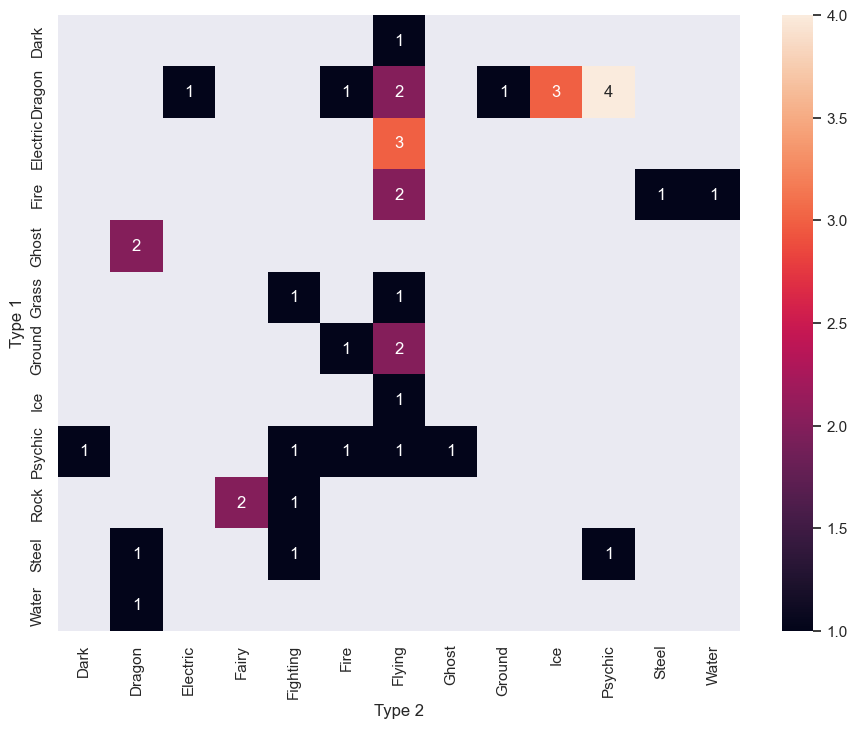

In [21]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(legtype_group.unstack(), annot = True)
plt.xticks(rotation = 90)
plt.show()

#### To check how many legendary pokemon there are per generations

<AxesSubplot: xlabel='Generation', ylabel='Name'>

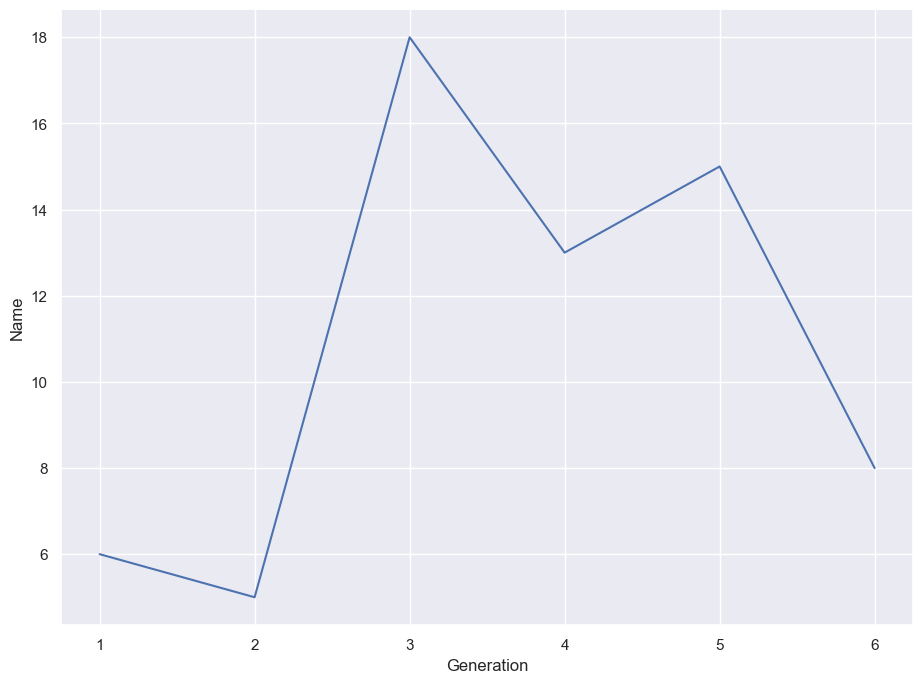

In [22]:
poke_gen = legendaryPokes.groupby('Generation')['Name'].count()
sns.lineplot(data = poke_gen)

In [23]:
legendaryPokes[legendaryPokes["Generation"]==3]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
377,Regirock,Rock,NA,580,80,100,200,50,100,50,3,True
378,Regice,Ice,NA,580,80,50,100,100,200,50,3,True
379,Registeel,Steel,NA,580,80,75,150,75,150,50,3,True
380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
382,Kyogre,Water,NA,670,100,100,90,150,140,90,3,True
382,KyogrePrimal Kyogre,Water,NA,770,100,150,90,180,160,90,3,True


In [24]:
max_type_per_gen = pokedex.groupby(['Generation', 'Type 1']).size()
max_type_per_gen


Generation  Type 1  
1           Bug         14
            Dragon       3
            Electric     9
            Fairy        2
            Fighting     7
                        ..
6           Poison       2
            Psychic      5
            Rock         9
            Steel        5
            Water        5
Length: 98, dtype: int64

<AxesSubplot: xlabel='Generation'>

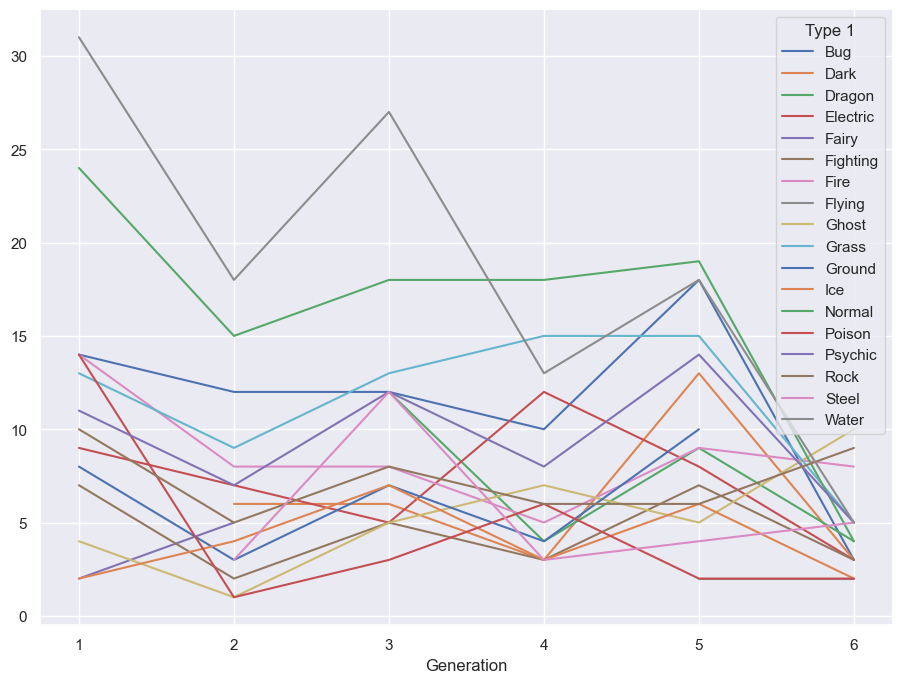

In [25]:
max_type_per_gen.unstack().plot()

In [26]:
type1_per_gen = pd.DataFrame({'count':pokedex.groupby(["Generation", 'Type 1']).size()}).reset_index()
type1_per_gen

,Generation,Type 1,count
0,1,Bug,14
1,1,Dragon,3
2,1,Electric,9
3,1,Fairy,2
4,1,Fighting,7
...,...,...,...
93,6,Poison,2
94,6,Psychic,5
95,6,Rock,9
96,6,Steel,5


#### Lets beautify the above plots with bokeh

In [27]:
from bokeh.palettes import Spectral11
from bokeh.plotting import figure, output_file, show
from bokeh.models import Legend, LegendItem

p = figure(width=1500, height=800, x_range=(1,8))
p.background_fill_color = 'beige'

p.title.text = 'Click on legend entries to hide the corresponding lines'
import random
legend_list = []
for type_id in type1_per_gen['Type 1'].unique():
    color = random.choice(Spectral11)
    df = pd.DataFrame(type1_per_gen[type1_per_gen['Type 1']==type_id])
    p.line(df['Generation'], df['count'], line_width=2, color=color, alpha=0.8, legend_label=type_id)

p.legend.location = "top_right"
p.legend.click_policy="hide"


show(p);

In [28]:
type1_total_gen = pd.DataFrame({'Total':pokedex.groupby(['Generation', 'Type 1'])
                                ['Total'].max()}).reset_index()
type1_per_gen

,Generation,Type 1,count
0,1,Bug,14
1,1,Dragon,3
2,1,Electric,9
3,1,Fairy,2
4,1,Fighting,7
...,...,...,...
93,6,Poison,2
94,6,Psychic,5
95,6,Rock,9
96,6,Steel,5


In [29]:
from bokeh.palettes import Spectral11
from bokeh.plotting import figure, output_file, show
from bokeh.models import Legend, LegendItem

p = figure(width=1500, height=800, x_range=(1,8))
p.background_fill_color = 'beige'

p.title.text = 'Click on legend entries to hide the corresponding lines'
import random
legend_list = []
for type_id in type1_total_gen['Type 1'].unique():
    color = random.choice(Spectral11)
    df = pd.DataFrame(type1_total_gen[type1_total_gen['Type 1']==type_id])
    p.line(df['Generation'], df['Total'], line_width=2, color=color, alpha=0.8, legend_label=type_id)

p.legend.location = "top_right"
p.legend.click_policy="hide"


show(p);